<a href="https://colab.research.google.com/github/drmnislam/-practical-devops/blob/main/ANS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**1-The Necessary Libraries**

In [ ]:
# Data handling and analysis
import pandas as pd
import numpy as np
import re

# Text preprocessing
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.utils import resample  # For sampling subsets of the training data
from sklearn.linear_model import LogisticRegression # Make sure this is imported
from sklearn.linear_model import SGDClassifier # Make sure this is imported
from sklearn.ensemble import RandomForestClassifier # Make sure this is imported
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**2-Load and show the dataset info**

In [ ]:
# Load the dataset
data_path = '/content/drive/My Drive/ANS_Project_Data/toxic_comment_classification_dataset.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display the shape of the dataset
print("\nShape of the dataset:")
print(f"The dataset has {df.shape[0]} entries and {df.shape[1]} columns.")

# Display column names and types
print("\nDataset Info:")
print(df.info())

# Summary of dataset
print("\nInitial Observations:")
print("- No missing values in either column." if df.isnull().sum().sum() == 0 else "- There are missing values in the dataset.")
print('- The "comment" column contains text data.')
print('- The "toxicity" column contains floating-point numbers, likely representing toxicity scores.')

First 5 rows of the dataset:
                                             comment  toxicity
0  He got his money... now he lies in wait till a...  0.373134
1  Mad dog will surely put the liberals in mental...  0.605263
2  And Trump continues his lifelong cowardice by ...  0.666667
3  "while arresting a man for resisting arrest".\...  0.815789
4  A bus or subway is a public service, is it not...  0.000000

Shape of the dataset:
The dataset has 83822 entries and 2 columns.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83822 entries, 0 to 83821
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   comment   83822 non-null  object 
 1   toxicity  83822 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB
None

Initial Observations:
- No missing values in either column.
- The "comment" column contains text data.
- The "toxicity" column contains floating-point numbers, likely representing toxicity

**3-Preprocessing**

In [ ]:

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Handle common negations
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)
    text = re.sub(r"'d", " would", text)
    # Remove punctuation, numbers, and special characters
    text = re.sub(r"[^a-z\s]", "", text)
    # Tokenize the text into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words to their root form
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back into a single string
    return " ".join(words)

# Apply preprocessing to the 'comment' column
df['cleaned_comment'] = df['comment'].apply(preprocess_text)

# Display a sample of the cleaned data
print("\nCleaned Data Sample:")
print(df[['comment', 'cleaned_comment']].head())

# Save the cleaned data (optional)
output_path = '/content/drive/My Drive/ANS_Project_Data/toxic_comment_classification_dataset.csv'
df.to_csv(output_path, index=False)
print(f"\nCleaned data saved to: {output_path}")


Cleaned Data Sample:
                                             comment  \
0  He got his money... now he lies in wait till a...   
1  Mad dog will surely put the liberals in mental...   
2  And Trump continues his lifelong cowardice by ...   
3  "while arresting a man for resisting arrest".\...   
4  A bus or subway is a public service, is it not...   

                                     cleaned_comment  
0  got money lie wait till election yr dirty poli...  
1  mad dog surely put liberal mental hospital boorah  
2  trump continues lifelong cowardice making anno...  
3  arresting man resisting arrest copsuckers ca s...  
4  bus subway public service difficult go public ...  

Cleaned data saved to: /content/drive/My Drive/ANS_Project_Data/toxic_comment_classification_dataset.csv


**4-Create Word Frequency for Toxic and Non-Toxic Comments**

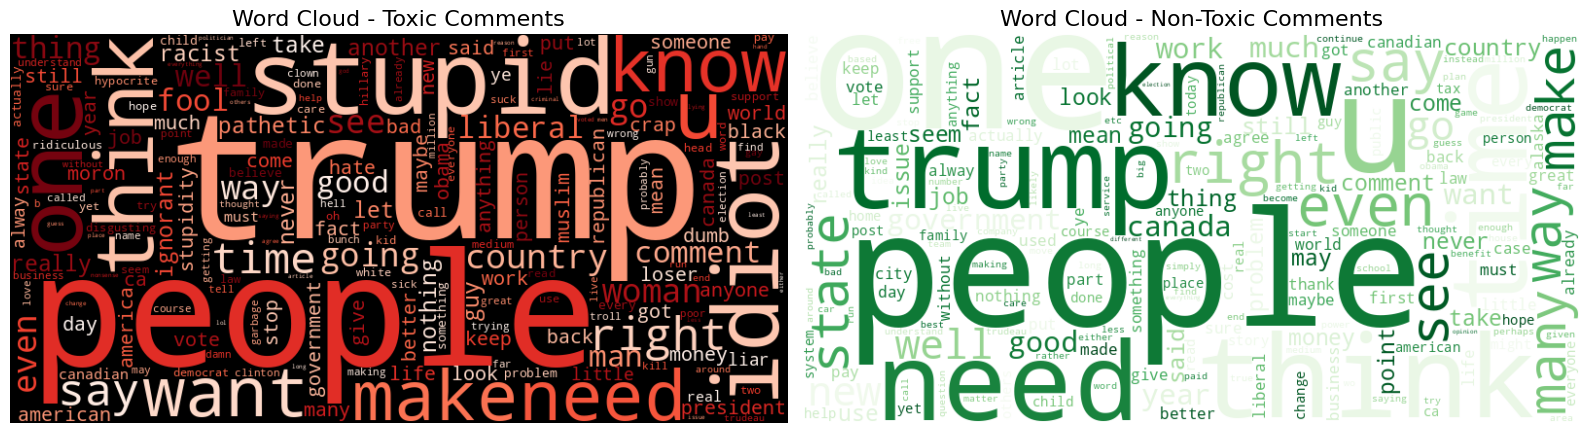

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate toxic and non-toxic comments
toxic_comments = df[df['toxicity'] > 0.5]['cleaned_comment']
non_toxic_comments = df[df['toxicity'] <= 0.5]['cleaned_comment']

# Generate word clouds
toxic_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(" ".join(toxic_comments))
non_toxic_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(" ".join(non_toxic_comments))

# Plot word clouds side by side
plt.figure(figsize=(16, 8))

# Toxic comments word cloud
plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Toxic Comments', fontsize=16)

# Non-toxic comments word cloud
plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Non-Toxic Comments', fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()

**5-Feature Engineering**

**5.1-TF-IDF vectorization**

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Word-level TF-IDF
word_vectorizer = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 2),
    max_features=10000
)

# Character-level TF-IDF
char_vectorizer = TfidfVectorizer(
    analyzer='char',
    ngram_range=(3, 5),
    max_features=5000
)

# Fit and transform the cleaned comments
word_tfidf = word_vectorizer.fit_transform(df['cleaned_comment'])
char_tfidf = char_vectorizer.fit_transform(df['cleaned_comment'])

# Combine word-level and character-level TF-IDF features
combined_tfidf = hstack([word_tfidf, char_tfidf])

# Display the shapes of the matrices
print("\nTF-IDF Matrix Shapes:")
print(f"Word-level TF-IDF shape: {word_tfidf.shape}")
print(f"Character-level TF-IDF shape: {char_tfidf.shape}")
print(f"Combined TF-IDF shape: {combined_tfidf.shape}")


TF-IDF Matrix Shapes:
Word-level TF-IDF shape: (83822, 10000)
Character-level TF-IDF shape: (83822, 5000)
Combined TF-IDF shape: (83822, 15000)


**5.2-Label Conversion and Data Splitting**

In [ ]:
# Print TF-IDF matrix shapes for clarity
print("\nTF-IDF Matrix Shapes:")
print(f"Word-level TF-IDF shape: {word_tfidf.shape}")
print(f"Character-level TF-IDF shape: {char_tfidf.shape}")
print(f"Combined TF-IDF shape: {combined_tfidf.shape}")

# Binarize the toxicity scores (e.g., toxic = 1 if toxicity > 0.5, else 0)
df['class_label'] = (df['toxicity'] > 0.5).astype(int)

# Confirm the distribution of the classes
print("\nClass Distribution:")
print(df['class_label'].value_counts())

# Update the target variable to use the new labels
y = df['class_label']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Use the updated combined TF-IDF matrix
X = combined_tfidf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split
print("\nModel is split into 80%-20% for training and testing.")
print(f"Training data shape: {X_train.shape} (Number of comments: {X_train.shape[0]})")
print(f"Testing data shape: {X_test.shape} (Number of comments: {X_test.shape[0]})")

# Additional descriptive output
total_comments = X.shape[0]
print(f"\nTraining set size: {X_train.shape[0]} comments ({(X_train.shape[0] / total_comments) * 100:.2f}%)")
print(f"Testing set size: {X_test.shape[0]} comments ({(X_test.shape[0] / total_comments) * 100:.2f}%)")



TF-IDF Matrix Shapes:
Word-level TF-IDF shape: (83822, 10000)
Character-level TF-IDF shape: (83822, 5000)
Combined TF-IDF shape: (83822, 15000)

Class Distribution:
class_label
0    70594
1    13228
Name: count, dtype: int64

Model is split into 80%-20% for training and testing.
Training data shape: (67057, 15000) (Number of comments: 67057)
Testing data shape: (16765, 15000) (Number of comments: 16765)

Training set size: 67057 comments (80.00%)
Testing set size: 16765 comments (20.00%)


**6-Model Training and Evaluation**

Training Logistic Regression...
Logistic Regression Evaluation:
Accuracy: 0.9368
Precision: 0.9412
Recall: 0.9368
F1-Score: 0.9384

Training Linear SVM (SGD)...
Linear SVM (SGD) Evaluation:
Accuracy: 0.9393
Precision: 0.9441
Recall: 0.9393
F1-Score: 0.9410

Training Random Forest...
Random Forest Evaluation:
Accuracy: 0.8873
Precision: 0.8814
Recall: 0.8873
F1-Score: 0.8837

Training XGBoost...
XGBoost Evaluation:
Accuracy: 0.9154
Precision: 0.9172
Recall: 0.9154
F1-Score: 0.9035



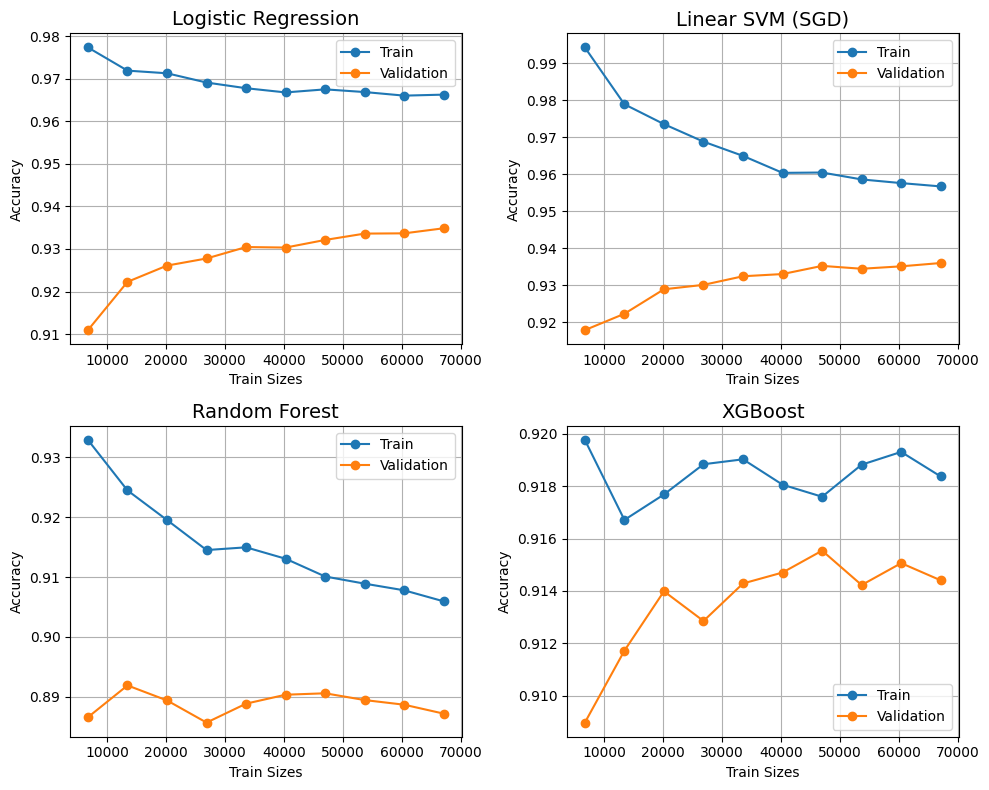


Model comparison saved to: /content/drive/My Drive/ANS_Project_Data/toxic_comment_classification_dataset.csv


In [ ]:

# Define models, including XGBoost
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced'),
    "Linear SVM (SGD)": SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        n_estimators=100,        # Fewer boosting rounds for speed
        max_depth=3,             # Shallower trees
        learning_rate=0.1,       # Higher learning rate
        subsample=0.8,           # Use 80% of rows per tree
        colsample_bytree=0.8,    # Use 80% of features per tree
        tree_method="hist",      # Fast CPU-based training
        random_state=42
    )
}

# Train, evaluate, and collect learning curve data
results = []
learning_curves = {model_name: {"train_sizes": [], "train_scores": [], "val_scores": []} for model_name in models}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    train_sizes = np.linspace(0.1, 1.0, 10)  # Use 10 different training sizes (10% to 100%)
    train_scores = []
    val_scores = []

    for train_size in train_sizes:
        # Sample a subset of the training data
        X_train_sample, y_train_sample = resample(
            X_train, y_train, n_samples=int(train_size * X_train.shape[0]), random_state=42
        )

        # Train the model
        model.fit(X_train_sample, y_train_sample)

        # Evaluate on the training subset
        train_pred = model.predict(X_train_sample)
        train_accuracy = accuracy_score(y_train_sample, train_pred)
        train_scores.append(train_accuracy)

        # Evaluate on the validation set
        val_pred = model.predict(X_test)
        val_accuracy = accuracy_score(y_test, val_pred)
        val_scores.append(val_accuracy)

    # Save learning curve data
    learning_curves[model_name]["train_sizes"] = train_sizes * X_train.shape[0]
    learning_curves[model_name]["train_scores"] = train_scores
    learning_curves[model_name]["val_scores"] = val_scores

    # Evaluate the model on the full training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Save results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")

# Plot learning curves
plt.figure(figsize=(10, 8))
for i, (model_name, data) in enumerate(learning_curves.items()):
    plt.subplot(2, 2, i + 1)
    plt.plot(data["train_sizes"], data["train_scores"], label="Train", marker='o')
    plt.plot(data["train_sizes"], data["val_scores"], label="Validation", marker='o')
    plt.title(model_name, fontsize=14)
    plt.xlabel("Train Sizes")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Save the results to a CSV file (optional)
results_df = pd.DataFrame(results)
results_path = '/content/drive/My Drive/ANS_Project_Data/toxic_comment_classification_dataset.csv'
results_df.to_csv(results_path, index=False)
print(f"\nModel comparison saved to: {results_path}")


**6.1-Model Performance Metrics**

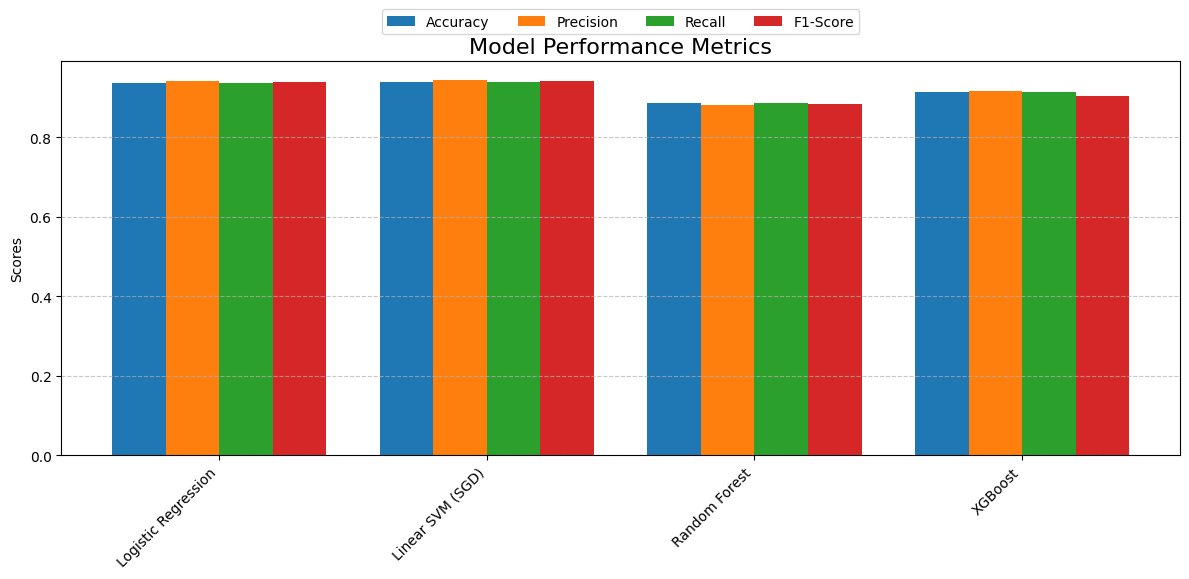

In [ ]:

# Extract metrics into arrays
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
model_names = list(results_df["Model"])  # Get all model names including XGBoost
num_metrics = len(metric_names)
num_models = len(model_names)

# Define distinct colors for each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red

# Define bar width
bar_width = 0.8 / num_metrics  # Adjust width based on the number of metrics

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate through models and metrics to plot bars
for i, model_name in enumerate(model_names):
    for j, metric in enumerate(metric_names):
        value = results_df.loc[results_df["Model"] == model_name, metric].values[0]
        x_pos = i + (j - (num_metrics - 1) / 2) * bar_width  # Center bars for each model
        ax.bar(x_pos, value, width=bar_width, color=colors[j], label=metric if i == 0 else "")  # Label only once

# Set chart properties
ax.set_xticks(np.arange(num_models))
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylabel("Scores")
ax.set_title("Model Performance Metrics", fontsize=16)
ax.legend(loc='upper center', ncol=num_metrics, bbox_to_anchor=(0.5, 1.15))
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

**6.2-Confusion Matrix**

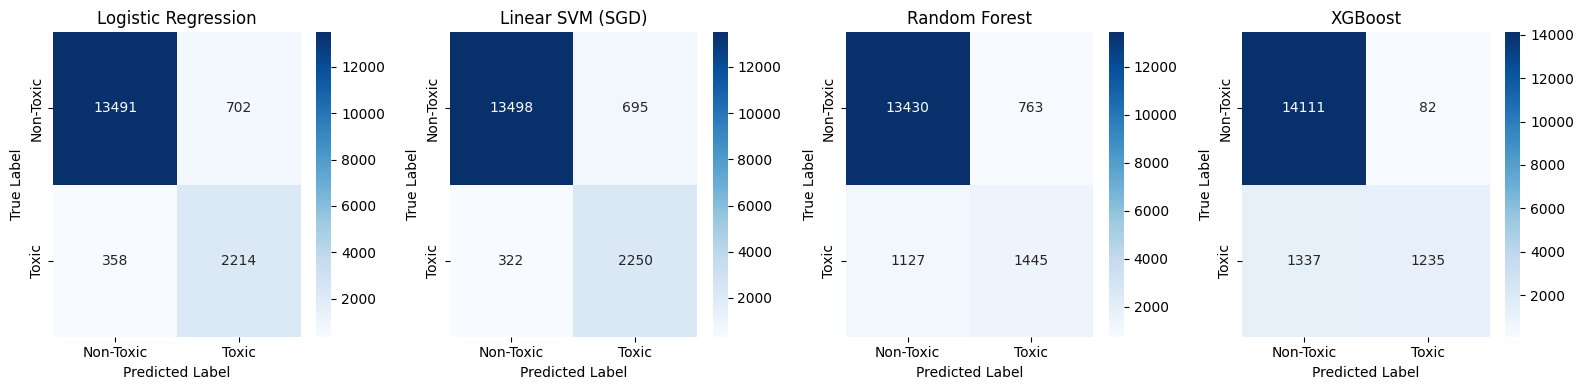

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions for each model
y_pred_logistic = models["Logistic Regression"].predict(X_test)
y_pred_svm = models["Linear SVM (SGD)"].predict(X_test)
y_pred_random_forest = models["Random Forest"].predict(X_test)
y_pred_xgboost = models["XGBoost"].predict(X_test)

# Model names and predictions
model_names = ["Logistic Regression", "Linear SVM (SGD)", "Random Forest", "XGBoost"]
predictions = [y_pred_logistic, y_pred_svm, y_pred_random_forest, y_pred_xgboost]

# Set up a grid of subplots (2x2)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Adjust for horizontal layout
axes = axes.ravel()  # Flatten the axes array for iteration

for i, (model_name, y_pred) in enumerate(zip(model_names, predictions)):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Toxic', 'Toxic'],
                yticklabels=['Non-Toxic', 'Toxic'],
                ax=axes[i])  # Use the correct subplot

    # Add title and labels
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Adjust layout for proper spacing
plt.tight_layout()
plt.show()


**7-Error Analysis and Misclassification Review**

In [ ]:
# Print the total size of the dataset
total_data_size = len(df)
print(f"\nTotal size of the dataset: {total_data_size} comments")

# Predictions for all models
y_preds = {
    "Logistic Regression": y_pred_logistic,
    "Linear SVM (SGD)": y_pred_svm,
    "Random Forest": y_pred_random_forest,
    "XGBoost": y_pred_xgboost  # Add XGBoost predictions
}

# Analyze misclassifications for each model
for model_name, y_pred in y_preds.items():
    # Find misclassified examples
    misclassified_indices = np.where(y_test != y_pred)[0]
    misclassified_labels = y_test.iloc[misclassified_indices]  # True labels
    predicted_labels = y_pred[misclassified_indices]  # Predicted labels

    # Count misclassifications for each class
    misclassified_toxic = np.sum((misclassified_labels == 1) & (predicted_labels == 0))  # Toxic predicted as Non-Toxic
    misclassified_non_toxic = np.sum((misclassified_labels == 0) & (predicted_labels == 1))  # Non-Toxic predicted as Toxic

    # Display results for the model
    print(f"\nNumber of Misclassified Examples ({model_name}):")
    print(f"Toxic predicted as Non-Toxic: {misclassified_toxic}")
    print(f"Non-Toxic predicted as Toxic: {misclassified_non_toxic}")

    # Display a few misclassified comments for review
    print(f"\nSample Misclassified Comments ({model_name}):")
    for i in range(min(1, len(misclassified_indices))):  # Display 1 example
        index = misclassified_indices[i]
        print(f"\nComment: {df['comment'].iloc[index]}")
        print(f"Cleaned Comment: {df['cleaned_comment'].iloc[index]}")
        print(f"Actual Label: {'Toxic' if y_test.iloc[index] == 1 else 'Non-Toxic'}")
        print(f"Predicted Label: {'Toxic' if y_pred[index] == 1 else 'Non-Toxic'}")



Total size of the dataset: 83822 comments

Number of Misclassified Examples (Logistic Regression):
Toxic predicted as Non-Toxic: 358
Non-Toxic predicted as Toxic: 702

Sample Misclassified Comments (Logistic Regression):

Comment: Something SAFE.... And you use vodka and whiskey as an example of that?! Gosh that is annoying.... That surely was a sarcastic comment right? If you actually think that marijuana provokes more criminal activity than alcohol, you're crazy. Or drunk. Lol... 

Here's the thing people, the problem is with these INDIVIDUALS that commit the crimes. Who obviously don't have good morals, or self-control, or they're just flat out greedy people... Add ANY drug (or money) to that personality type and it will not end well. 

It's pretty stupid because many drugs can be great for medicinal use, but instead it's abused. Human nature. It's not always beautiful.
Cleaned Comment: something safe use vodka whiskey example gosh annoying surely sarcastic comment right actually t

**8-Random Sampling and Prediction Review**

In [ ]:
# Randomly sample comments from the test set
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)  # Select 5 random comments
sample_comments = df.iloc[random_indices]

# Predict using Logistic Regression and XGBoost
sample_features = X_test[random_indices]
logistic_predictions = models["Logistic Regression"].predict(sample_features)
xgboost_predictions = models["XGBoost"].predict(sample_features)

# Display the results
for i, comment in enumerate(sample_comments['comment']):
    print(f"\nComment: {comment}")
    print(f"Actual Label: {'Toxic' if y_test.iloc[random_indices[i]] == 1 else 'Non-Toxic'}")
    print(f"Logistic Regression Prediction: {'Toxic' if logistic_predictions[i] == 1 else 'Non-Toxic'}")
    print(f"XGBoost Prediction: {'Toxic' if xgboost_predictions[i] == 1 else 'Non-Toxic'}")


Comment: You idiot we are talking about the ruination of our political system as we know it. What you are saying is yes I am in a car crash but that car crash over there is worse. Grow up.
Actual Label: Non-Toxic
Logistic Regression Prediction: Non-Toxic
XGBoost Prediction: Non-Toxic

Comment: Actually there are only four ridings that could conceivably flip if you look at past elections and the shifts.  Absentee ballots tend to lean NDP, but not always so below are the four that could flip.

Courtenay-Comox (NDP by 9 votes)
Maple Ridge-Mission (NDP by 120 votes)
Coquitlam-Burke Mountain (BC Liberals by 170 votes)
Richmond-Queensborough (BC Liberals by 263 votes)

All the others are over 500 vote differences and the Greens did not come within a 1,000 votes in any other riding besides the three they won, so NDP anywhere from 39-43 seats, BC Liberals anywhere from 41-45 seats.  The second and last are unlikely to flip, third is possible, while first is the most likely of them all but no 

**9-User Input Prediction**

In [ ]:

# Function for predicting user input
def predict_comment(comment, model, word_vectorizer, char_vectorizer): # Added char_vectorizer
    # Preprocess the input comment
    preprocessed_comment = preprocess_text(comment)

    # Transform using both vectorizers
    word_tfidf = word_vectorizer.transform([preprocessed_comment])
    char_tfidf = char_vectorizer.transform([preprocessed_comment])

    # Combine features
    from scipy.sparse import hstack # Import hstack here for combining features
    comment_features = hstack([word_tfidf, char_tfidf]) # Combine word and char features

    # Predict using the specified model
    prediction = model.predict(comment_features)
    return "Toxic" if prediction[0] == 1 else "Non-Toxic"

# Example usage
user_comment = input("Enter a comment to classify: ")
result = predict_comment(user_comment, models["Logistic Regression"], word_vectorizer, char_vectorizer) # Pass char_vectorizer
print(f"Prediction: {result}")


Enter a comment to classify: MY TEACH TELL ME THAT I SHOULD FIND THE LINK I AM KIILLING HIM BY ASKING THE LINK OF THE DATA
Prediction: Non-Toxic


**10-User Input Prediction with Toxic Score**

In [ ]:

# Function for predicting user input
def predict_comment(comment, model, word_vectorizer, char_vectorizer):
    # Preprocess the input comment
    preprocessed_comment = preprocess_text(comment)

    # Transform using both vectorizers
    word_tfidf = word_vectorizer.transform([preprocessed_comment])
    char_tfidf = char_vectorizer.transform([preprocessed_comment])

    # Combine features
    from scipy.sparse import hstack
    comment_features = hstack([word_tfidf, char_tfidf])

    # Predict using the specified model
    prediction = model.predict(comment_features)[0] # Get the prediction (0 or 1)

    # Get the probability (toxic score)
    toxic_score = model.predict_proba(comment_features)[0][1] # Probability of class 1 (toxic)

    return "Toxic" if prediction == 1 else "Non-Toxic", toxic_score

# Example usage
user_comment = input("Enter a comment to classify: ")
result, toxic_score = predict_comment(user_comment, models["Logistic Regression"], word_vectorizer, char_vectorizer)
print(f"Prediction: {result}")
print(f"Toxic Score: {toxic_score:.4f}") # Display toxic score with 4 decimal places

Enter a comment to classify: Mad dog will surely put the liberals.
Prediction: Non-Toxic
Toxic Score: 0.4029
